<a href="https://colab.research.google.com/github/andrewpkitchin/notes/blob/main/Correlation_and_p_values.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Correlation does not imply ~~causation~~ correlation!

The standard for considering a result "statistically significant" in terms of correlation and p-value can vary depending on the field of study and the specific context of the research. However, there are some general guidelines commonly used:

**Correlation Coefficient (r):** The value of the correlation coefficient ranges from -1 to +1. The closer the absolute value of the coefficient is to 1, the stronger the correlation (either positive or negative). A correlation of 0 indicates no correlation. Typically, a correlation coefficient is considered:

*   Strong if it is greater than 0.5 (positive) or less than -0.5 (negative).
*   Moderate if it is between 0.3 and 0.5 (positive) or -0.3 and -0.5 (negative).
*   Weak if it is between 0.1 and 0.3 (positive) or -0.1 and -0.3 (negative).

**P-Value:** The p-value indicates the probability of obtaining the observed results assuming that the null hypothesis is true (in this case, the null hypothesis usually states that there is no correlation). A lower p-value suggests that the observed correlation is not likely due to random chance. The standard thresholds for p-values are:
*   0.05 (5%): This is the most commonly used threshold. A p-value less than 0.05 is often considered statistically significant, indicating that there is less than a 5% probability that the observed correlation occurred by chance under the null hypothesis.
*   0.01 (1%): In some fields, or for more stringent testing, a p-value less than 0.01 is used as the cutoff for statistical significance.
*   0.001 (0.1%): For extremely stringent tests, a p-value less than 0.001 might be considered.


Checking for correlation between to randomly generated data sets.

A thousand trials, two independent random varibles, and sample size 150.

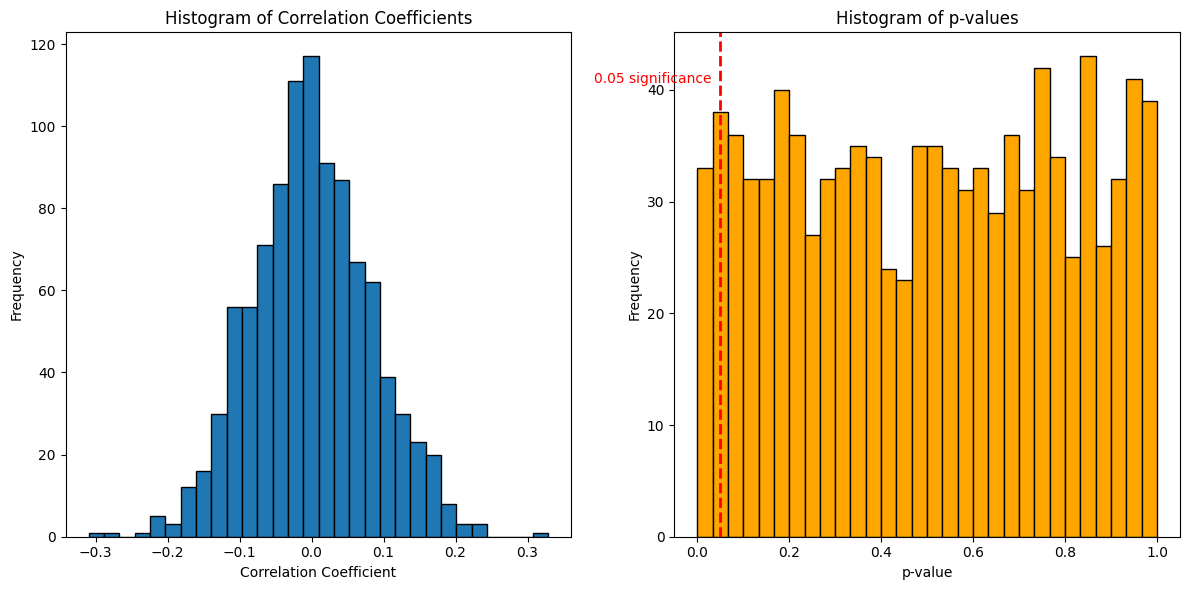

Number of samples with p-value < 0.05: 56
Number of samples with p-value < 0.01: 10
Number of samples with p-value < 0.001: 3


In [ ]:
import numpy as np
import matplotlib.pyplot as plt
import scipy.stats as stats

# Number of trials
n_trials = 1000

# Sample size
sample_size = 150

# Store correlation coefficients and p-values
correlation_coefficients = []
p_values = []

for _ in range(n_trials):
    # Generate two sets of random data
    x1 = np.random.rand(sample_size)
    x2 = np.random.rand(sample_size)

    # Compute the Pearson correlation coefficient and p-value
    correlation, p_value = stats.pearsonr(x1, x2)
    correlation_coefficients.append(correlation)
    p_values.append(p_value)

# Count the number of samples with p-values less than 0.05, 0.01, and 0.001
p_less_than_005 = sum(p < 0.05 for p in p_values)
p_less_than_001 = sum(p < 0.01 for p in p_values)
p_less_than_0001 = sum(p < 0.001 for p in p_values)

# Creating a figure with two subplots
fig, (ax1, ax2) = plt.subplots(1, 2, figsize=(12, 6))

# Plotting the correlation coefficients
ax1.hist(correlation_coefficients, bins=30, edgecolor='black')
ax1.set_xlabel('Correlation Coefficient')
ax1.set_ylabel('Frequency')
ax1.set_title('Histogram of Correlation Coefficients')

# Plotting the p-values with a marker for the 0.05 significance level
ax2.hist(p_values, bins=30, edgecolor='black', color='orange')
ax2.axvline(x=0.05, color='red', linestyle='dashed', linewidth=2)
ax2.set_xlabel('p-value')
ax2.set_ylabel('Frequency')
ax2.set_title('Histogram of p-values')
ax2.text(0.05, ax2.get_ylim()[1]*0.9, '0.05 significance  ', color='red', ha='right')

plt.tight_layout()
plt.show()

# Printing the number of samples with p-values less than 0.05, 0.01, and 0.001
print(f'Number of samples with p-value < 0.05: {p_less_than_005}')
print(f'Number of samples with p-value < 0.01: {p_less_than_001}')
print(f'Number of samples with p-value < 0.001: {p_less_than_0001}')

**Nothing surprising is happening here:** The observation that around 7% of trials return a p-value of less than 0.05, even with randomly generated data, is actually in line with the fundamental definition of the p-value and the concept of statistical significance.

Here's why this happens and how it relates to fields like social psychology:

**Definition of P-Value:** The p-value is the probability of obtaining an effect at least as extreme as the one in your sample data, assuming that the null hypothesis (no effect) is true. When you set the significance level at 0.05, you're accepting a 5% chance of rejecting the null hypothesis when it is actually true. So, in an ideal scenario with perfectly random data and no true effect, about 5% of your tests should yield p-values under 0.05 purely by chance.

**Implications for Research:** This phenomenon highlights a crucial aspect of statistical analysis in research, especially in fields like social psychology where sample sizes can be relatively small (like 150 or fewer participants). When researchers conduct experiments and use p-values to determine significance, there's always a probability of finding a 'significant' result purely by chance, even when there is no actual underlying effect. This probability is exactly what the p-value quantifies.

**Multiple Comparisons and Replication:** In fields that rely on statistical significance (like social psychology), this underscores the importance of being cautious about interpreting p-values, particularly in the context of multiple comparisons. Each additional comparison increases the likelihood of finding a significant result by chance. This is why replication of studies and results is crucial in scientific research. A single study showing a significant result at the p < 0.05 level might just be a statistical fluke. Replication helps ensure that findings are not just the result of random chance.